# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [116]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']

### Now take a look at the shapes of the X and y matricies 

In [117]:
display(X.shape)
display(y.shape)

(70000, 784)

(70000,)

### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [118]:
display(X[36000])

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

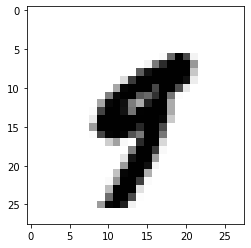

In [119]:
plt.imshow(X[36000].reshape(28,28), cmap = plt.cm.binary, interpolation="nearest");

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

In [120]:
display(y[36000])

'9'

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [121]:
X_train = X[:60000]
X_test = X[60000:]

y_train = y[:60000]
y_test = y[60000:]

### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [122]:
y_train_5 = np.where(y_train == '5', 5, 0)
y_test_5 = np.where(y_test == '5', 5, 0)

In [124]:
display(y_train_5)
display(y_test_5)

array([5, 0, 0, ..., 5, 0, 0])

array([0, 0, 0, ..., 0, 5, 0])

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [125]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()

In [127]:
model_lr.fit(X_train, y_train_5)

/home/bob/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

### Does the classifier predict correctly the 36000th digit we picked before?

In [130]:
y_pred_5 = model_lr.predict(X_train)

In [134]:
y_pred_5[36000] == y_train_5[3600]

True

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [135]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [136]:
never_5_clf.fit(X_train, y_train_5)

In [137]:
never_5_clf.predict(X_test)

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [147]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score

In [149]:
print('f1_score\n')
display(f1_score(y_test_5, model_lr.predict(X_test),pos_label=5))
display(f1_score(y_test_5, never_5_clf.predict(X_test),pos_label=5))

f1_score



0.8708357685563999

0.0

In [150]:
print('precision_score\n')
display(precision_score(y_test_5, model_lr.predict(X_test),pos_label=5, average='weighted'))
display(precision_score(y_test_5, never_5_clf.predict(X_test),pos_label=5, average='weighted'))

precision_score



/home/bob/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1270: UserWarning: Note that pos_label (set to 5) is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


0.9773572978329322

/home/bob/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.82955664

In [151]:
print('recall_score\n')
display(recall_score(y_test_5, model_lr.predict(X_test),pos_label=5))
display(recall_score(y_test_5, never_5_clf.predict(X_test),pos_label=5))


recall_score



0.8352017937219731

0.0

In [152]:
print('confusion_matrix\n')
display(confusion_matrix(y_test_5, model_lr.predict(X_test)))
display(confusion_matrix(y_test_5, never_5_clf.predict(X_test)))

confusion_matrix



array([[9034,   74],
       [ 147,  745]])

array([[9108,    0],
       [ 892,    0]])

### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

Logisitic regresion seems to be more acurrate, since TP and TN are much more better identified.

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

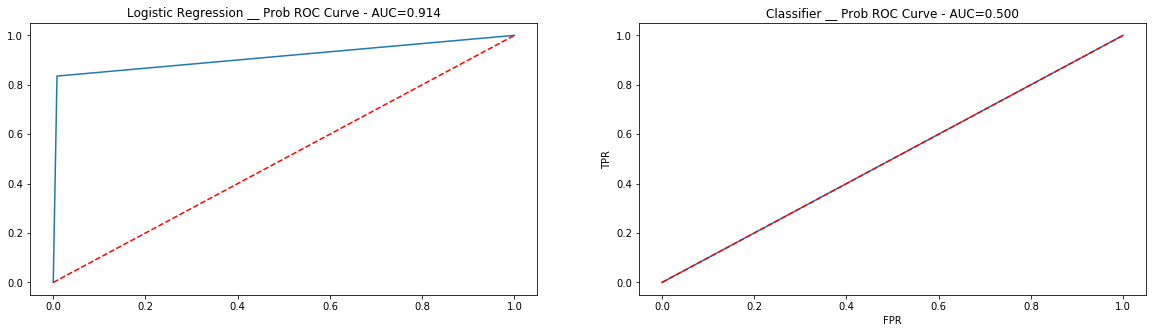

In [189]:
y_pred_lr = model_lr.predict(X_test)
y_pred_c5 = never_5_clf.predict(X_test)


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))


fpr, tpr, thresholds = roc_curve(y_test_5, y_pred_lr,pos_label=5)
a = roc_auc_score(y_test_5, y_pred)
ax[0].plot(fpr, tpr,)
ax[0].plot(fpr, fpr, 'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
ax[0].set_title(f'Logistic Regression __ Prob ROC Curve - AUC={a:.3f}')

fpr, tpr, thresholds = roc_curve(y_test_5, y_pred_c5,pos_label=5)
a = roc_auc_score(y_test_5, y_pred_c5)
ax[1].plot(fpr, tpr,)
ax[1].plot(fpr, fpr, 'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
ax[1].set_title(f'Classifier __ Prob ROC Curve - AUC={a:.3f}')




plt.show();

### Now find the roc_auc_score for each. 

In [194]:
y_pred=model_lr.predict(X_test)
print('Logistic regressor roc_auc_score is: ',roc_auc_score(y_test_5, y_pred))

y_pred=never_5_clf.predict(X_test)
print('Classifier roc_auc_score is: ',roc_auc_score(y_test_5, y_pred))

Logistic regressor roc_auc_score is:  0.9135385341029717
Classifier roc_auc_score is:  0.5


### What does this metric tell you? Which classifier works better with this metric in mind?

Classifier tends to achive values arround the mean, while the accuracy of the logistic regressor it's much more better.